In [1]:
!pip install Biopython
!pip install wordcloud
!pip install spacy
!pip install gensim
!pip install pyLDAvis
!python -m spacy download en_core_web_sm

import pandas as pd
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from pprint import pprint
from gensim.models import CoherenceModel
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 36.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 31.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This be

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
df=pd.read_csv('uc3_all_pmids.csv')
df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,PMID
0,32721652
1,29860482
2,30242316
3,29740819
4,35888685
...,...
2946,31298180
2947,30896328
2948,32980344
2949,34887591


In [3]:
lists=df['PMID'].tolist()
len(lists)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2951

In [4]:
from Bio import Entrez

Entrez.email = 'your_email@provider.com'

pmids = lists
handle = Entrez.efetch(db="pubmed", id=','.join(map(str, pmids)),
                       rettype="xml", retmode="text")
records = Entrez.read(handle)


abstract=[]
noma=0
n=0
for pubmed_article in records['PubmedArticle']:
  n=n+1           
  try:
    abstract.append(pubmed_article['MedlineCitation']['Article']['Abstract']['AbstractText'][0])
  except: 
    # abstract.append('\nno abstracts available.\n')
    noma=noma+1
    continue
    


# abstract_dict = dict(zip(pmids, abstracts))
abstract


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Lung cancer remains the leading cause of cancer related deaths worldwide. Lung cancer screening using low-dose computed tomography (LDCT) has been shown to reduce lung cancer specific mortality. In 2013, the United States Preventive Services Task Force (USPSTF) recommended annual lung cancer screening with LDCT for smokers aged between 55 years to 80 years, with at least 30 pack-years of smoking exposure that currently smoke or who have quit smoking within 15 years. Risk-based lung cancer screening is an alternative approach that defines screening eligibility based on the personal risk of individuals. Selection of individuals for lung cancer screening based on their personal lung cancer risk has been shown to improve the sensitivity and specificity associated with the eligibility criteria of the screening program as compared to the 2013 USPSTF criteria. Numerous risk prediction models have been developed to estimate the lung cancer risk of individuals incorporating sociodemographic, 

In [5]:
print(len(abstract))
print(noma)
print(n)

2759
5
2764


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
with open("stopwords.txt", "r") as f:
    sw = f.read().split()
    
for w in range(0,len(sw)):
  sw[w]=sw[w].strip()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
abstract_=abstract.copy()
# abstract_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize

def lemmatize_and_remove_stopwords(sentence,ssww):

  lemmat=WordNetLemmatizer()

  stopWords = nltk.corpus.stopwords.words('english')
  extra = ssww
  stopWords.extend(extra)

  filtered_list = []
  stop_words = stopWords
  words = word_tokenize(sentence)
  for w in words:
      if w.lower() not in stop_words:
          filtered_list.append(lemmat.lemmatize(w))         

  return " ".join(filtered_list)

for x in range(0,len(abstract_)):
  abstract_[x]=re.sub(r'\b[A-Z]+[0-9]*s?\b','', abstract_[x])
  abstract_[x]=re.sub(r'[\(\[].*?[\)\]]','', abstract_[x])
  abstract_[x]=abstract_[x].lower()
  abstract_[x]=re.sub(r'attributes=.*}','',abstract_[x])
  abstract_[x]=re.sub(r'StringElement','',abstract_[x])
  abstract_[x]=re.sub(r'\(.{0,5}\)','',abstract_[x])
  abstract_[x]=re.sub(r'[^\w\s]','',abstract_[x])
  abstract_[x]=re.sub(r'[0-9]',' ',abstract_[x])
  abstract_[x]=re.sub(r'(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', abstract_[x])
  # abstract_[x]=re.sub(r'[a-z]+[^\w]+',' ',abstract_[x])
  abstract_[x]=re.sub(r'\xa0.*',' ',abstract_[x])
  abstract_[x]=lemmatize_and_remove_stopwords(abstract_[x],sw)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
abstract_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['lung remains leading cause worldwide lung screening using lowdose computed tomography shown reduce lung specific united state preventive task force recommended annual lung screening smoker aged year year least packyears smoking exposure currently smoke quit smoking year riskbased lung screening alternative approach defines screening eligibility based personal individual selection individual lung screening based personal lung shown improve sensitivity specificity associated eligibility criterion screening criterion numerous prediction model developed estimate lung individual incorporating sociodemographic smoking factor associated lung age smoking history sex raceethnicity personal history history emphysema chronic obstructive pulmonary prediction model include biomarker germline mutation proteinbased biomarkers independent predictor addition smoking sociodemographic factor majority lung prediction model suitable selecting highrisk individual lung screening model developed predict mal

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = abstract_
data_words = list(sent_to_words(data))

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
dictionary = gensim.corpora.Dictionary(data_words)
bow_corpus = [dictionary.doc2bow(doc) for doc in data_words]

from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    perplexity_values= []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=num_topics,random_state=100,update_every=1,passes=10,alpha='auto',per_word_topics=True,)        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))


    return model_list, coherence_values, perplexity_values

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dictionary, corpus=corpus_tfidf, texts=data_words, start=10, limit=100, step=20)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


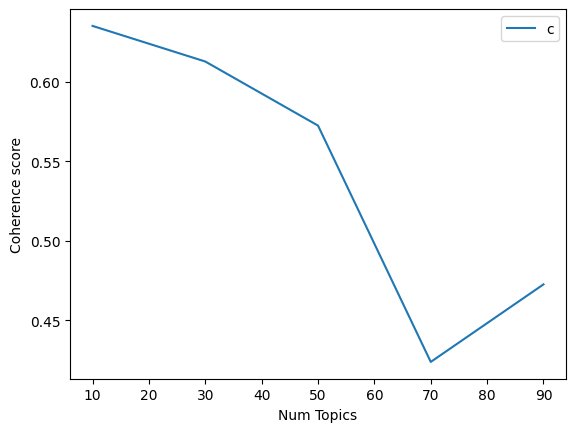

In [15]:
# Show graph
import matplotlib.pyplot as plt

limit=100; start=10; step=20;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [16]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 10  has Coherence Value of 0.635
Num Topics = 30  has Coherence Value of 0.6126
Num Topics = 50  has Coherence Value of 0.5723
Num Topics = 70  has Coherence Value of 0.4239
Num Topics = 90  has Coherence Value of 0.4726


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


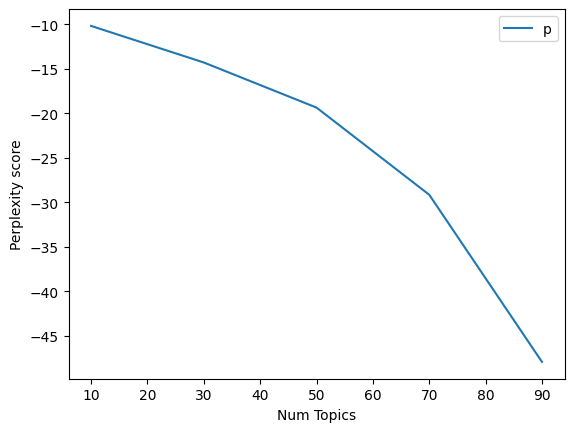

In [17]:
limit=100; start=10; step=20;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

In [18]:
for m, cv in zip(x, perplexity_values):
    print("Num Topics =", m, " has perplixity Value of", round(cv, 4))

Num Topics = 10  has perplixity Value of -10.199
Num Topics = 30  has perplixity Value of -14.3034
Num Topics = 50  has perplixity Value of -19.3673
Num Topics = 70  has perplixity Value of -29.1536
Num Topics = 90  has perplixity Value of -47.9182


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True,
                                            )

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_tfidf]

[(0,
  '0.004*"cholesterol" + 0.004*"endoflife" + 0.003*"aortic" + 0.003*"trauma" + '
  '0.003*"consequence" + 0.002*"nurse" + 0.002*"stem" + 0.002*"anaemia" + '
  '0.002*"atezolizumab" + 0.002*"antiangiogenic"'),
 (1,
  '0.006*"suicide" + 0.005*"fat" + 0.004*"intraperitoneal" + 0.003*"aneurysm" '
  '+ 0.003*"rituximab" + 0.003*"diet" + 0.003*"suicidal" + '
  '0.002*"cannabinoids" + 0.002*"social" + 0.002*"cemiplimab"'),
 (2,
  '0.005*"cervical" + 0.003*"sarcoma" + 0.003*"prediction" + 0.003*"bone" + '
  '0.002*"profile" + 0.002*"convalescent" + 0.002*"hysterectomy" + '
  '0.002*"resectable" + 0.002*"tomography" + 0.002*"organization"'),
 (3,
  '0.003*"injury" + 0.003*"ventilation" + 0.003*"admission" + 0.003*"unit" + '
  '0.003*"dying" + 0.003*"ferroptosis" + 0.003*"aging" + 0.003*"albumin" + '
  '0.003*"triplenegative" + 0.003*"cardiotoxicity"'),
 (4,
  '0.005*"opioid" + 0.004*"alcohol" + 0.003*"coronary" + 0.003*"ageing" + '
  '0.003*"sedentary" + 0.003*"tuberculosis" + 0.003*"nonca

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -10.19900523738384

Coherence Score:  0.6349513742430626


In [22]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_tfidf, dictionary)
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.324713  0.002304       1        1  65.934648
2      0.043095  0.132323       2        1   7.594670
5      0.028625 -0.015123       3        1   4.754118
4      0.040428 -0.029153       4        1   3.764750
7      0.041355 -0.022159       5        1   3.673168
0      0.041403 -0.015252       6        1   3.667195
3      0.038121 -0.011618       7        1   3.285948
8      0.038156 -0.019601       8        1   3.250827
6      0.030577 -0.013862       9        1   2.293351
1      0.022954 -0.007860      10        1   1.781326, topic_info=              Term       Freq      Total Category  logprob  loglift
78         smoking  10.000000  10.000000  Default  30.0000  30.0000
2291        statin   4.000000   4.000000  Default  29.0000  29.0000
131       cervical   5.000000   5.000000  Default  28.0000  28.0000
852       lymphoma   7.000000   7.000000  Default  27.0000  27.0000
1658        mirnas   3.000000   3.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
6646        aortic   0.330340   1.995962  Topic10  -6.4854   2.2291
2999   preparation   0.309170   1.644714  Topic10  -6.5516   2.3564
2759  atezolizumab   0.306185   1.606360  Topic10  -6.5613   2.3703
476         repair   0.319091   3.799958  Topic10  -6.5200   1.5505
757     peritoneal   0.291646   2.404096  Topic10  -6.6100   1.9184

[442 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1385      6  0.867321        ability
5492      7  0.961420  acceptability
2016      8  0.735323         access
1742      2  0.518858        adenoma
1443      7  0.657761      admission
...     ...       ...            ...
981       5  0.810890        vitamin
2073      2  0.845043          vitro
344       3  0.618908         widely
344       6  0.309454         widely
90        1  0.962990           year

[392 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 6, 5, 8, 1, 4, 9, 7, 2])

In [ ]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True,
                                            )

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pprint(lda_model2.print_topics())
doc_lda = lda_model2[corpus_tfidf]
## topic modeling new improved cleaning 30 topics

[(0,
  '0.005*"mirna" + 0.005*"breast" + 0.004*"survivorship" + 0.004*"endpoint" + '
  '0.004*"neck" + 0.003*"association" + 0.003*"prognosis" + 0.003*"implant" + '
  '0.003*"colorectal" + 0.003*"pancreatic"'),
 (1,
  '0.004*"ki" + 0.004*"intervention" + 0.004*"immune" + 0.004*"colorectal" + '
  '0.004*"system" + 0.004*"tobacco" + 0.004*"packaging" + '
  '0.004*"prognostication" + 0.003*"subtypes" + 0.003*"sitting"'),
 (2,
  '0.004*"advanced" + 0.004*"radiotherapy" + 0.004*"extensivestage" + '
  '0.004*"hepatocellular" + 0.004*"benefit" + 0.003*"caribbean" + '
  '0.003*"ligation" + 0.003*"subsub" + 0.003*"gastric" + 0.003*"licensed"'),
 (3,
  '0.004*"apps" + 0.004*"haemoglobin" + 0.004*"mir" + 0.003*"epithelial" + '
  '0.003*"progression" + 0.003*"anastomotic" + 0.003*"esophagectomy" + '
  '0.003*"leakage" + 0.003*"decreased" + 0.003*"category"'),
 (4,
  '0.005*"chemotherapy" + 0.004*"gene" + 0.004*"renal" + 0.004*"ccrcc" + '
  '0.004*"radiotherapy" + 0.003*"receptor" + 0.003*"rapidly"

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model2.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=data_words, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -11.070228335381456

Coherence Score:  0.5871538870649095


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model2, corpus_tfidf, dictionary)
vis
## number of topics 30 // with improved cleaning

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.020582  0.031301       1        1  12.595630
0      0.050442 -0.002598       2        1  11.935765
2     -0.015535 -0.034969       3        1  11.382337
9     -0.010644 -0.013632       4        1  10.838870
3      0.002054  0.020998       5        1  10.454121
5     -0.003530 -0.005439       6        1  10.001938
1     -0.004087 -0.001394       7        1   9.623472
8     -0.004168 -0.000193       8        1   9.339032
6      0.004198  0.003064       9        1   8.260727
7      0.001851  0.002861      10        1   5.568110, topic_info=                Term      Freq     Total Category  logprob  loglift
211          ovarian  0.000000  0.000000  Default  30.0000  30.0000
2             breast  0.000000  0.000000  Default  29.0000  29.0000
1340           fluid  0.000000  0.000000  Default  28.0000  28.0000
1224  transformation  0.000000  0.000000  Default  27.0000  27.0000
181        dosedense  0.000000  0.000000  Default  26.0000  26.0000
...              ...       ...       ...      ...      ...      ...
513          present  0.072307  0.504299  Topic10  -5.9963   0.9459
292             head  0.074280  0.565823  Topic10  -5.9693   0.8577
13        prognostic  0.086085  1.295821  Topic10  -5.8218   0.1766
179     chemotherapy  0.077156  0.920189  Topic10  -5.9314   0.4094
30         prognosis  0.073465  1.233668  Topic10  -5.9804   0.0672

[457 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 10, 4, 6, 2, 9, 7, 8])

In [ ]:
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus_tfidf,
                                           id2word=dictionary,
                                           num_topics=70, 
                                           random_state=100,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True,
                                            )

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pprint(lda_model3.print_topics())
doc_lda = lda_model3[corpus_tfidf]

[(68,
  '0.001*"highgrade" + 0.001*"delayed" + 0.001*"superficial" + '
  '0.001*"selection" + 0.001*"selecting" + 0.001*"proper" + '
  '0.001*"preservation" + 0.001*"optimal" + 0.001*"nonetheless" + '
  '0.001*"assessed"'),
 (32,
  '0.001*"highgrade" + 0.001*"delayed" + 0.001*"superficial" + '
  '0.001*"selection" + 0.001*"selecting" + 0.001*"proper" + '
  '0.001*"preservation" + 0.001*"optimal" + 0.001*"nonetheless" + '
  '0.001*"assessed"'),
 (7,
  '0.001*"highgrade" + 0.001*"delayed" + 0.001*"superficial" + '
  '0.001*"selection" + 0.001*"selecting" + 0.001*"proper" + '
  '0.001*"preservation" + 0.001*"optimal" + 0.001*"nonetheless" + '
  '0.001*"assessed"'),
 (16,
  '0.001*"highgrade" + 0.001*"delayed" + 0.001*"superficial" + '
  '0.001*"selection" + 0.001*"selecting" + 0.001*"proper" + '
  '0.001*"preservation" + 0.001*"optimal" + 0.001*"nonetheless" + '
  '0.001*"assessed"'),
 (64,
  '0.001*"highgrade" + 0.001*"delayed" + 0.001*"superficial" + '
  '0.001*"selection" + 0.001*"sele

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model3, corpus_tfidf, dictionary)
vis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster      Freq
topic                                                                   
1     -0.223296+0.000000j -0.023810+0.000000j       1        1  6.803256
69    -0.008506+0.000000j  0.180090+0.000000j       2        1  4.620852
2     -0.030634+0.000000j  0.026586+0.000000j       3        1  4.245356
9      0.012515+0.000000j  0.052791+0.000000j       4        1  3.732603
67     0.017917+0.000000j -0.055329+0.000000j       5        1  3.679012
...                   ...                 ...     ...      ...       ...
43    -0.001762+0.000000j  0.001303+0.000000j      66        1  0.364792
44    -0.001762+0.000000j  0.001303+0.000000j      67        1  0.364792
45    -0.001762+0.000000j  0.001303+0.000000j      68        1  0.364792
19    -0.001762+0.000000j  0.001303+0.000000j      69        1  0.364792
35    -0.001762+0.000000j  0.001303+0.000000j      70        1  0.364792

[70 rows x 5 column